# Support Vector Machine (SVM)

SVM dalam klasifikasi berhubungan dengan pengoptimalan suatu hyperplane sehingga dapat memisahkan dua kelas. Data training svm harus secara linear dapat dipisahkan(linearly separable)

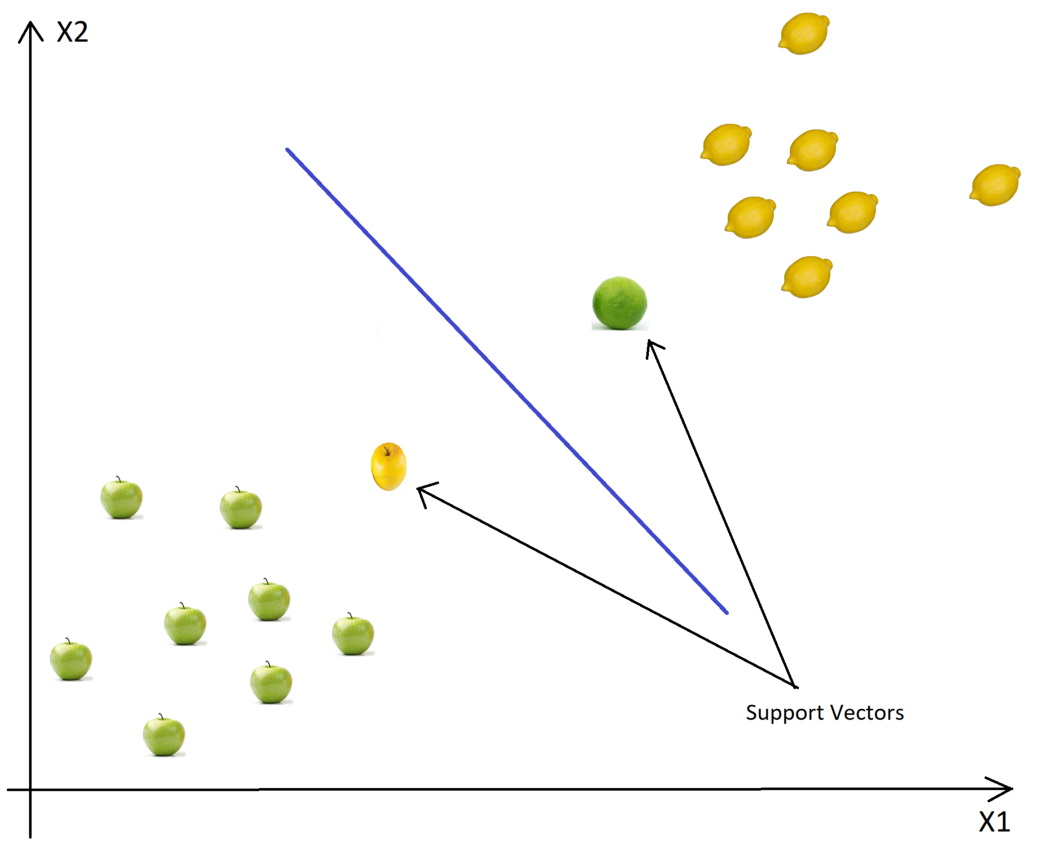

Pada gambar diatas kita ingin membuat hyperplane (garis biru), sehingga dapat memisahkan apel dan lemon.
Support vector adalah data training yang paling mendekati kelas lainnya. Padad gambar diatas apel berwarna kuning masih dikategorikan apel sedangkan lemon berwarna hijau tetapi masih dikategorikan lemon.
Pembentukan garis hyperplane ini bergantung dari support vectornya, selain dari support vectornya data training lain tidak berguna.

Sekarang kita bisa saja menggambar seperti ini

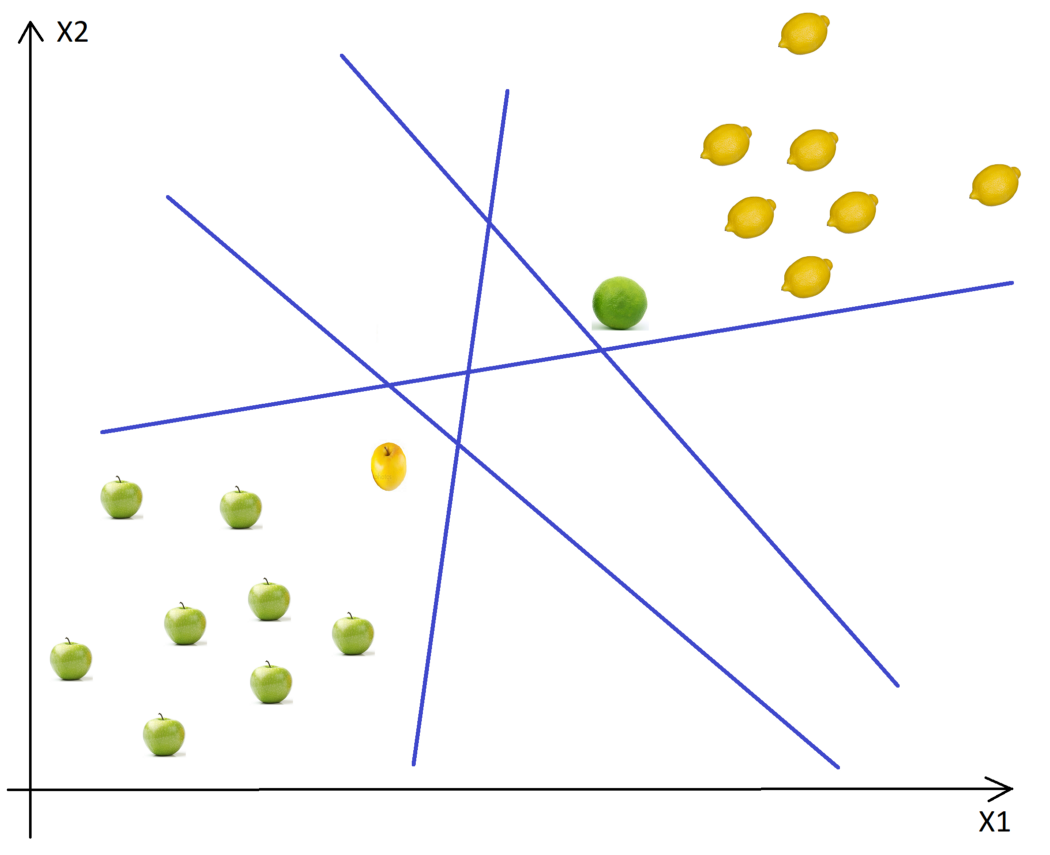

Sehingga dapat kita simpulkan kita dapat membuat hyperplane tak hingga yang dapat memisahkan dua kelas. sedangkan yang kita inginkan adalah hyperplance optimal. hyperplane optimal tentu terjadi ketika hyper plane tersebut jauh dari apel maupun lemon. hal inilah yang mendukung konsep margin. 
Margin adalah jarak dari hyperplane sampai support vector. Oleh karena itu ada margin. margin atas adalah margin positif sedangkan bawah adalah negatif. kedua margin ini berjarak sama dengan hyperplane

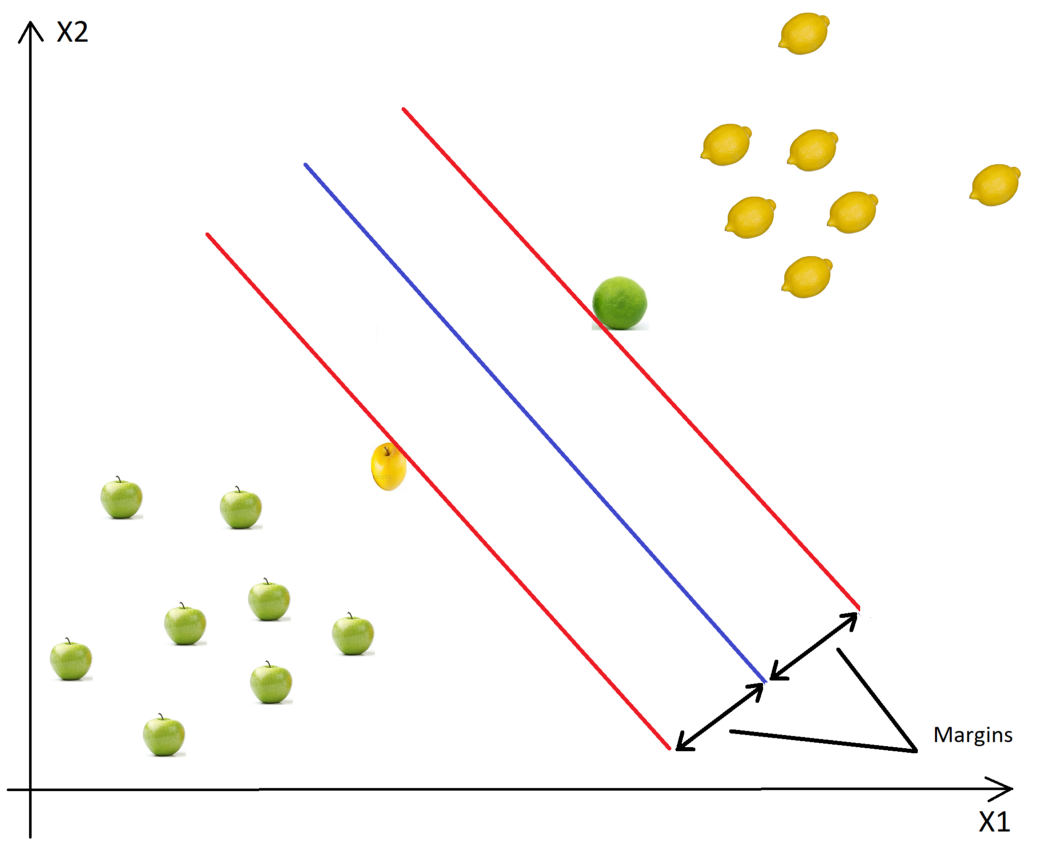

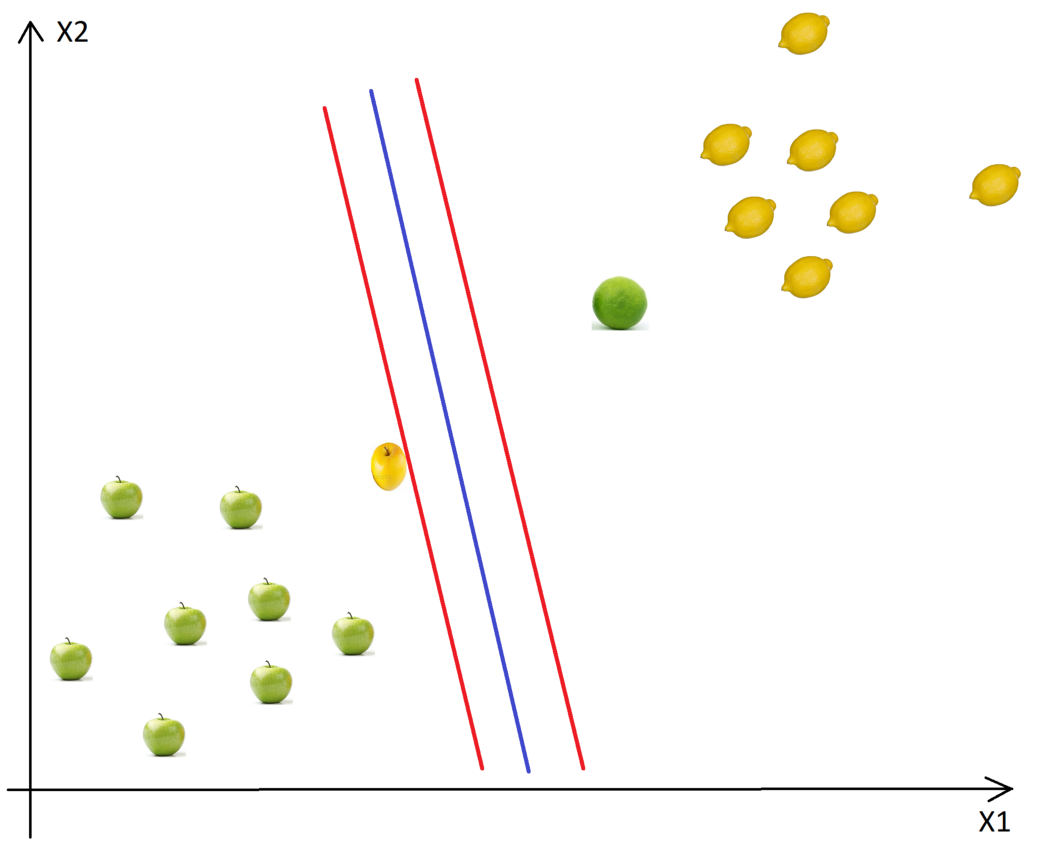

Jika kita bandingkan kedua gambar diatas tentu gambar yang lebih ke atas yang memiliki hyperplane yang lebih baik. Hal ini karena gambar atas memiliki margin yang lebih besar
Tugas mesin adalah mencari garis yang dapat memisahkan kelas-kelas ini dan dengan margin sebesar-besarnya

Karena SVM hanya dapat memisahkan 2 kelas yang berbeda, maka untuk memisahkan multiclass dataset, ada beberapa trik


1.   one-to-one. pada trik ini setiap antar 2 kelas akan dibuat sebuah hyperplane. Sehingga jika terdapat sejumlah m kelas akan dibuat m(m-1)/2 hyperplane svm.
2.   one-to-rest. Pada trik ini, dibuat seakan-akan suatu kelas akan mengganggap kelas lainnya sebagai suatu grup (kelas), sehingga akan dibuat hyperplane antara kelas tersebut dengan kelas lainnya (seperti mengisolasi diri). Trik ini akan dibuat m hyperplane svm



One-to-one akan membuat svm antar 2 kelas, sehingga poin yang bukan kelas tersebut akan tidak dianggap dalam pembuatan svm tersebut. Contoh antara poin-poin biru dan merah. Jika ingin dibuat svm antar 2 kelas ini maka poin hijau tidak akan dianggap terlebih dahulu. Begitu juga antar hijau dan biru, maka kelas merah tidak akan dianggap terlebih dahulu. dan seterusnya sampai tidak ada lagi svm antar 2 kelas yang tersisa

Contoh one-to-one
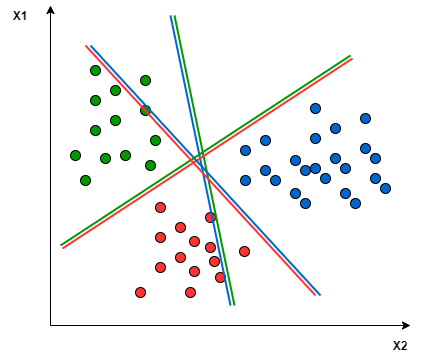

One-to-rest akan membuat hyperplane svm antara kelas tersebut dengan sisanya. Contoh svm hijau akan membuat garis svm kelas hijau terhadap grup biru dan merah. untuk svm biru garis svmnya adalah antara kelas biru terhadap grup hijau dan merah, dan seterusnya

contoh one-to-rest
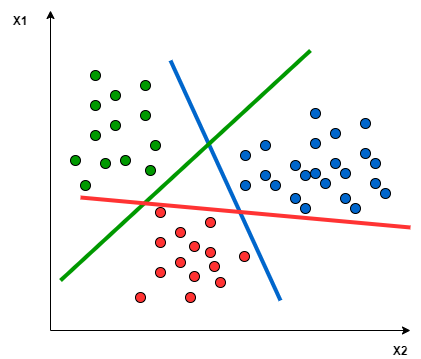

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y=y.reshape(len(y),1)

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

## Training the SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=0)
classifier.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

Karena penjelasan diatas menggunakan svm dengan kernel linear, masih belum menggunakan kernel non-linear seperti rbf

## Predicting a new result

In [6]:
X_new_scaled = ss.transform(np.array([[29,150000]]))
print(X_new_scaled)
classifier.predict(X_new_scaled)

[[-0.90383437  2.331532  ]]


array([1])

## Predicting the Test set results

In [7]:
X_test_scaled = ss.transform(X_test)
y_test_pred=classifier.predict(X_test_scaled)
score = classifier.score(X_test_scaled,y_test)
print(score)

0.9


## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[66,  2],
       [ 8, 24]])

## Visualising the Training set results

## Visualising the Test set results